In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housing-price-data/Housing_Price_Data.csv


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('/kaggle/input/housing-price-data/Housing_Price_Data.csv')

In [4]:
df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [5]:
df.tail(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
535,2100000,3360,2,1,1,yes,no,no,no,no,1,no,unfurnished
536,1960000,3420,5,1,2,no,no,no,no,no,0,no,unfurnished
537,1890000,1700,3,1,2,yes,no,no,no,no,0,no,unfurnished
538,1890000,3649,2,1,1,yes,no,no,no,no,0,no,unfurnished
539,1855000,2990,2,1,1,no,no,no,no,no,1,no,unfurnished
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [7]:
# Check for missing values
missing_values = df.isnull().sum()

In [8]:
missing_values

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [9]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [10]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [16]:
df['price'].value_counts

<bound method IndexOpsMixin.value_counts of 0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64>

In [13]:
df['area'].value_counts

<bound method IndexOpsMixin.value_counts of 0      7420
1      8960
2      9960
3      7500
4      7420
       ... 
540    3000
541    2400
542    3620
543    2910
544    3850
Name: area, Length: 545, dtype: int64>

In [14]:
df['basement'].value_counts

<bound method IndexOpsMixin.value_counts of 0       no
1       no
2      yes
3      yes
4      yes
      ... 
540    yes
541     no
542     no
543     no
544     no
Name: basement, Length: 545, dtype: object>

In [15]:
df['prefarea'].value_counts

<bound method IndexOpsMixin.value_counts of 0      yes
1       no
2      yes
3      yes
4       no
      ... 
540     no
541     no
542     no
543     no
544     no
Name: prefarea, Length: 545, dtype: object>

Data Visualization

Distribution of price

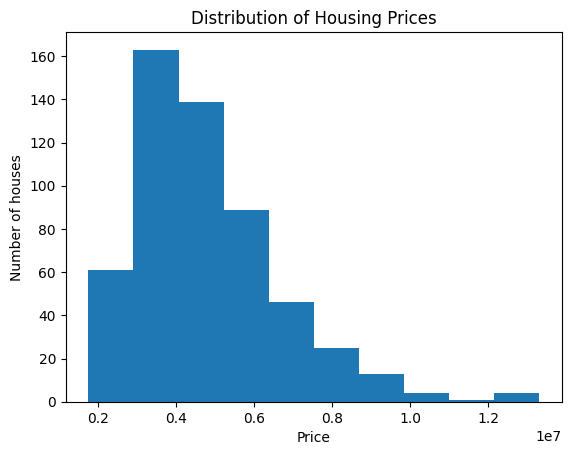

In [11]:
import matplotlib.pyplot as plt

# Distribution of price
plt.hist(df['price'])
plt.xlabel('Price')
plt.ylabel('Number of houses')
plt.title('Distribution of Housing Prices')
plt.show()

Relationship between features price vs Area

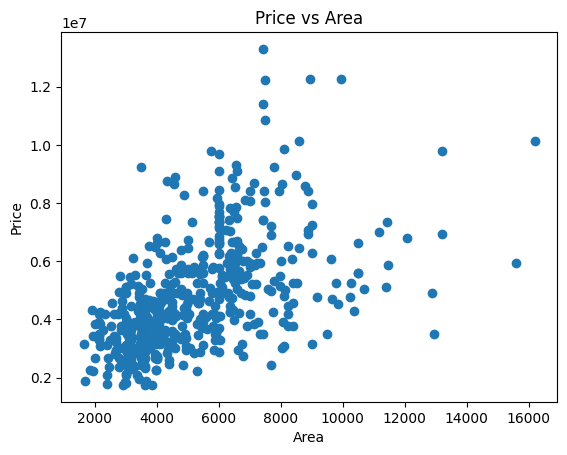

In [18]:
import matplotlib.pyplot as plt

# Relationship between features price vs square footage
plt.scatter(df['area'], df['price'])
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Price vs Area')
plt.show()

Model Predictive

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Convert categorical columns to numeric using LabelEncoder
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Separate features and target
X = df.drop('price', axis=1)
y = df['price']

# Convert to numpy arrays for machine learning
X_np = X.to_numpy()
y_np = y.to_numpy()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_np, y_np, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((436, 12), (109, 12), (436,), (109,))

train the Linear Regression model

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create and train the Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = linear_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(1771751116594.0352, 0.6494754192267803)

Feature Selection

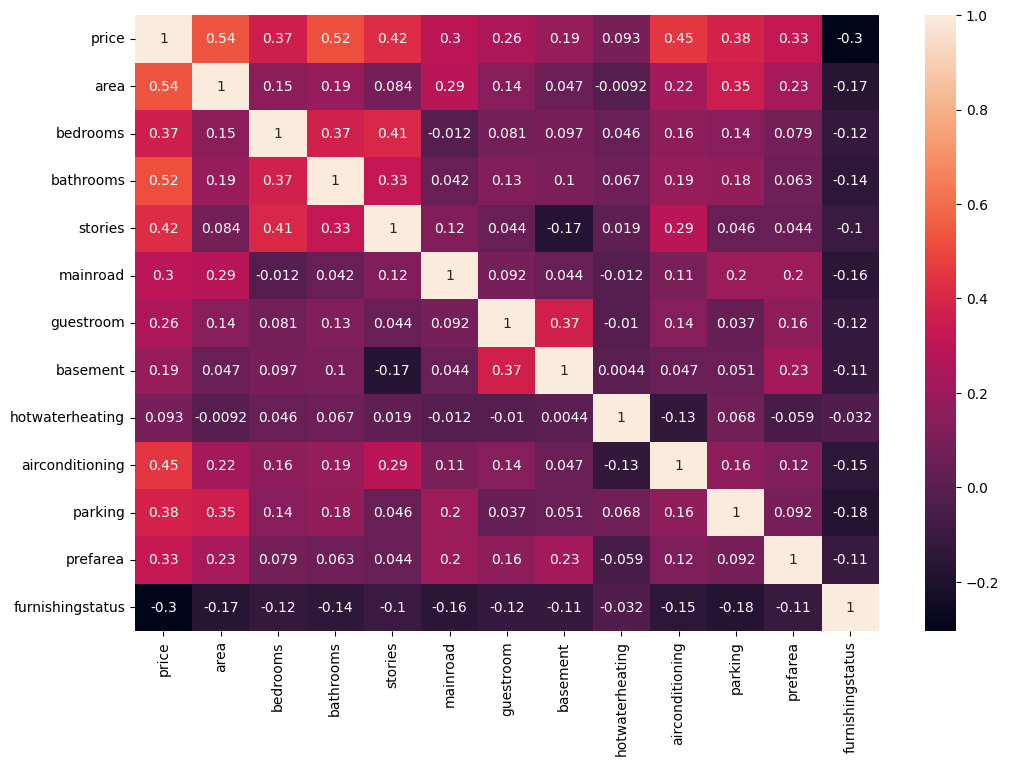

price               1.000000
area                0.535997
bathrooms           0.517545
airconditioning     0.452954
stories             0.420712
parking             0.384394
bedrooms            0.366494
prefarea            0.329777
mainroad            0.296898
guestroom           0.255517
basement            0.187057
hotwaterheating     0.093073
furnishingstatus   -0.304721
Name: price, dtype: float64
[0.46478386 0.04276195 0.15494801 0.05553196 0.00966478 0.01778506
 0.03089759 0.01683055 0.05512193 0.06149083 0.03489926 0.05528422]


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation analysis
correlation_matrix = df.corr()

# Simple heatmap of correlations
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

# Focus on correlations with the target variable ('price')
print(correlation_matrix['price'].sort_values(ascending=False))

# Dimensionality Reduction (PCA)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # Keep top 2 principal components 
principal_components = pca.fit_transform(X)  # Assuming your features are in 'X'

# Feature Importance (Random Forest)
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X, y)  # Assuming your features are in 'X', target variable in 'y'

print(rf.feature_importances_)

Advanced Modeling

In [25]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(random_state=42) 
dt_model.fit(X_train, y_train) 

# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)  

# XGBoost Regressor
from xgboost import XGBRegressor

xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train) 

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Hyperparameter Tuning

In [26]:
from sklearn.model_selection import GridSearchCV

# Example Grid Search for a Random Forest model
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [4, 6, 8],
    'min_samples_leaf': [2, 4, 6]
}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)  # 5-fold cross-validation
grid_search.fit(X_train, y_train) 

print(grid_search.best_params_)

{'max_depth': 8, 'min_samples_leaf': 2, 'n_estimators': 50}


Interpretation

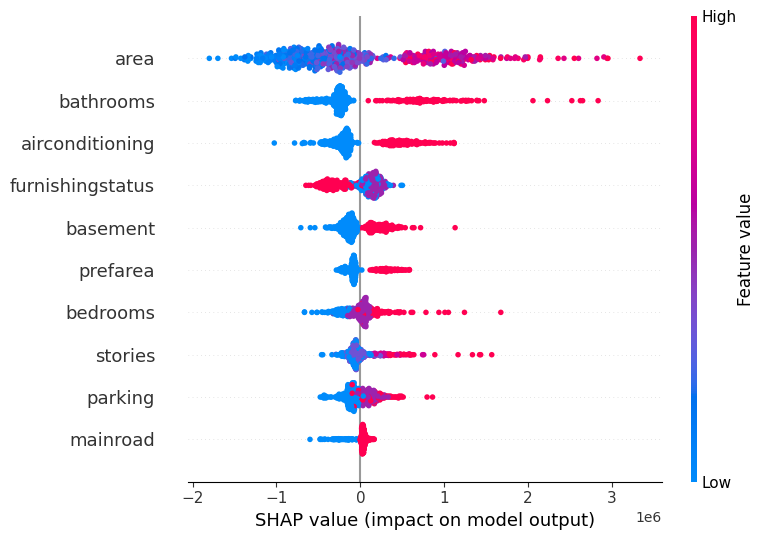

In [27]:
import shap

# Assuming you've trained an XGBoost model named 'xgb_model' on data 'X' and 'y'
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X)

# Force plot to show the top features impacting price
shap.summary_plot(shap_values, X, max_display=10) 

# To understand an individual prediction:
index_to_explain = 50  # Index of the data point in X you want to explain 
shap_force_plot = shap.force_plot(explainer.expected_value, shap_values[index_to_explain,:], X.iloc[index_to_explain,:]) 